# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1T-Rxqg5k528hCXGGvRMXM7BIkhXBhg4m?usp=sharing

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [1]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [2]:
import pandas as pd
import numpy as np

# add random seed for numpy in order to reproduce output
np.random.seed(1517)

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [3]:
# the first two lines are commented out because last cell has already done it
# import numpy as np
# raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [4]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [5]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [6]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [7]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)
  
  # softmax
  output = softmax(layer2)
 
  #Back propagation using gradient descent
  
  #cross-entropy loss
  error = - 1 / X_train.shape[0] * np.sum(y_train * np.log(output))

  #initialize gradients to zero 
  dw0 = np.zeros(w0.shape)
  dw1 = np.zeros(w1.shape)

  #calculate gradients
  dL_du = (output - y_train) / X_train.shape[0]
  du_dv_hat = w1.T
  dv_hat_dv = layer1*(1-layer1)
  dv_dw0 = X_train
  du_dw1 = layer1

  #determine gradients
  dw1 += du_dw1.T.dot(dL_du)
  dw0 += dv_dw0.T.dot((dL_du).dot(du_dv_hat)*(dv_hat_dv))
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))

  return (error, dW, output)


### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

In [8]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
np.random.seed(1517)
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [9]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 2) # change rounding to 2 decimals because output is returned from ann() instead of layer2
pred[:5]

array([[0.96, 0.04, 0.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.08, 0.91],
       [0.02, 0.74, 0.25],
       [0.  , 0.04, 0.96]])

In [10]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

<font color='blue'>As showed above, the network works very well and successfully predicts the classes of the first 5 samples. The entry with largest probability in the row represents the predicted class. The model is very confident in its prediction (the highest probability is over 50% and much higher than the second highest for each sample).<br><br>
Inreasing learning rate to 0.01 while keeping iterations the same would make training result even better (but might be overfitting), as showed below.
</font> 

In [11]:
# repeat training process with new learning rate of 0.01
#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.01
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)

#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 2) # change rounding to 2 decimals because output is returned from ann() instead of layer2
pred[:5]

array([[1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ]])

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

In [12]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] + 0.000001
  We2[ind] = We2[ind] - 0.000001
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 -0.0008142994056825614 -0.0008142994377113922
0.0 -0.06423217124851277 -0.06423217115781044
0.0 -0.023705825635822464 -0.023705825645984516
0.0 -0.015390069663112627 -0.015390069659548825
0.0 0.023298587503717272 0.02329858745181485
0.0 0.002685574873595442 0.00268557481390047
0.0 -0.02762517004040177 -0.02762516993613651
0.0 -0.009581504589739609 -0.00958150463995434
0.0 -0.00698738911175667 -0.006987389226341836
0.0 0.05006031689180901 0.05006031698313026
0.0 -0.011719907044849265 -0.011719907069541936
0.0 -0.06158051035765055 -0.06158051040778379
0.0 -0.020297678093861293 -0.02029767826511751
0.0 0.027324061568911873 0.02732406154015406
0.0 -0.09023078761938308 -0.09023078777864298
0.0 -0.00662129107098508 -0.006621291044067178
0.0 -0.02492603146109218 -0.02492603143212019
0.0 -0.006456863266279811 -0.006456863220436562
0.0 0.02899778284159993 0.028997782737936757
0.0 -0.05095007937772067 -0.0509500792440596
0.0 -2.7618018982877857e-05 -2.7618043099926953e-05
0.0 -0.000597648153

<font color='blue'>Confirmed! The gradients are computed correctly. The analytical result and numerical result are matching.</font> 

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [13]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [14]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(999) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [15]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

Files already downloaded and verified
Files already downloaded and verified


### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

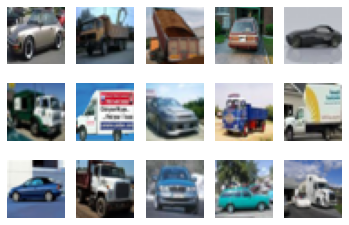

In [16]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

In [17]:
print('Number of traning examples:',len(train_loader.sampler.indices))
print('Number of validation examples:',len(val_loader.sampler.indices))
print('Number of test examples:',len(test_loader.sampler.indices))


Number of traning examples: 8000
Number of validation examples: 2000
Number of test examples: 2000


### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

Why do we need a validation set when training out model?<br>
Answer:<br>
<font color='blue'>Validation set is used for hyperparameter tunning. When tuning hyperparameter, we want to make sure the model can generalize well, thus a dataset other than training set is needed for model performance evaluation. If test set is used for hyperparameter tuning, the hyperparameter selection might become biased towards test set. Therefore, a dataset different from training set and test set is needed for hyperparameter tuning when training model, which is validation set. At the end, test set is used to confirm the validation set result is not biased.</font> 

What happens if we judge the performance of our models using the training set loss/error instead of the validation set loss/error?<br>
Answer:<br>
<font color='blue'>Since the model is trained based on training set, it can be overfitting on training set. Overfitting occurs very often. If we judge performance of models using training set loss/error, then our judgement is biased, and we would have no idea how the model performs when it is applied to some new data. </font> 

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [18]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [19]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [20]:
# add random seed for reproducing result
torch.manual_seed(1517)
small_net = SmallNet()
torch.manual_seed(1517)
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [21]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [22]:
# find total number of parameters in small_net
small_net_total_parameters_num = 0
for param in small_net.parameters():
    small_net_total_parameters_num += param.numel()
print('Total number of parameters in small_net:',small_net_total_parameters_num)

# find total number of parameters in large_net
large_net_total_parameters_num = 0
for param in large_net.parameters():
    large_net_total_parameters_num += param.numel()
print('Total number of parameters in large_net:',large_net_total_parameters_num)

Total number of parameters in small_net: 386
Total number of parameters in large_net: 9705


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [23]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

<font color='blue'>default batch_size: 64<br>
default learning_rate: 0.01<br>
default num_epochs: 30</font> 

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [24]:
# call train_net with small_net, and train for 5 epochs
train_net(net=small_net, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.37275, Train loss: 0.6397163472175598 |Validation err: 0.3095, Validation loss: 0.5861985981464386
Epoch 2: Train err: 0.27925, Train loss: 0.5542722227573395 |Validation err: 0.259, Validation loss: 0.5337807638570666
Epoch 3: Train err: 0.227125, Train loss: 0.4869966142177582 |Validation err: 0.2245, Validation loss: 0.46722713112831116
Epoch 4: Train err: 0.2045, Train loss: 0.4499949662685394 |Validation err: 0.2195, Validation loss: 0.46389015391469
Epoch 5: Train err: 0.1935, Train loss: 0.43159388709068297 |Validation err: 0.2, Validation loss: 0.435357179492712
Finished Training
Total time elapsed: 18.71 seconds


<font color='blue'>
model_small_bs64_lr0.01_epoch0: dictionary of state of network (infrastructure and parameter values) at the end of 1st epoch<br>
model_small_bs64_lr0.01_epoch1: dictionary of state of network (infrastructure and parameter values) at the end of 2nd epoch<br>
model_small_bs64_lr0.01_epoch2: dictionary of state of network (infrastructure and parameter values) at the end of 3rd epoch<br>
model_small_bs64_lr0.01_epoch3: dictionary of state of network (infrastructure and parameter values) at the end of 4th epoch<br>
model_small_bs64_lr0.01_epoch4: dictionary of state of network (infrastructure and parameter values) at the end of 5th epoch<br>
model_small_bs64_lr0.01_epoch4_train_err.csv: classification error of training set at the end of each epoch (5 in total)<br>
model_small_bs64_lr0.01_epoch4_train_loss.csv: loss function value of training set at the end of each epoch (5 in total)<br>
model_small_bs64_lr0.01_epoch4_val_err.csv: classification error of validation set at the end of each epoch (5 in total)<br>
model_small_bs64_lr0.01_epoch4_val_loss.csv: loss function value of validation set at the end of each epoch (5 in total)<br></font> 

### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [25]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
# modified version of train_net so that the files are saved at google drive
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), folder_path + model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(folder_path + "{}_train_err.csv".format(model_path), train_err)
    np.savetxt(folder_path + "{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt(folder_path + "{}_val_err.csv".format(model_path), val_err)
    np.savetxt(folder_path + "{}_val_loss.csv".format(model_path), val_loss)

In [27]:
# Re-initialize networks
# add random seed for reproducing result
torch.manual_seed(1517)
small_net = SmallNet()
torch.manual_seed(1517)
large_net = LargeNet()

In [28]:
# train small_net
train_net(net=small_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.37275, Train loss: 0.6397163472175598 |Validation err: 0.3095, Validation loss: 0.5861985981464386
Epoch 2: Train err: 0.27925, Train loss: 0.5542722227573395 |Validation err: 0.259, Validation loss: 0.5337807638570666
Epoch 3: Train err: 0.227125, Train loss: 0.4869966142177582 |Validation err: 0.2245, Validation loss: 0.46722713112831116
Epoch 4: Train err: 0.2045, Train loss: 0.4499949662685394 |Validation err: 0.2195, Validation loss: 0.46389015391469
Epoch 5: Train err: 0.1935, Train loss: 0.43159388709068297 |Validation err: 0.2, Validation loss: 0.435357179492712
Epoch 6: Train err: 0.181375, Train loss: 0.4205983341932297 |Validation err: 0.197, Validation loss: 0.44087814167141914
Epoch 7: Train err: 0.177375, Train loss: 0.4091997953653336 |Validation err: 0.197, Validation loss: 0.430656336247921
Epoch 8: Train err: 0.178, Train loss: 0.4048000094890595 |Validation err: 0.183, V

In [29]:
# train large_net
train_net(net=large_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.412875, Train loss: 0.6767443437576294 |Validation err: 0.3595, Validation loss: 0.6285851411521435
Epoch 2: Train err: 0.333375, Train loss: 0.6070109910964966 |Validation err: 0.2875, Validation loss: 0.561675027012825
Epoch 3: Train err: 0.276, Train loss: 0.550046735048294 |Validation err: 0.25, Validation loss: 0.506458911113441
Epoch 4: Train err: 0.249875, Train loss: 0.5107868003845215 |Validation err: 0.272, Validation loss: 0.5387637047097087
Epoch 5: Train err: 0.227, Train loss: 0.4735171065330505 |Validation err: 0.19, Validation loss: 0.4220350105315447
Epoch 6: Train err: 0.179125, Train loss: 0.4087346011400223 |Validation err: 0.2165, Validation loss: 0.45245027448982
Epoch 7: Train err: 0.167125, Train loss: 0.3849948502779007 |Validation err: 0.166, Validation loss: 0.39458177611231804
Epoch 8: Train err: 0.158875, Train loss: 0.3707580373287201 |Validation err: 0.1545, 

<font color='blue'>
Note: each time the following time elapsed result might be slightly different. There is no random seed for runtime. <br><br>

Total time elapsed for small_net: 115.61 seconds <br>
Total time elapsed for large_net: 124.56 seconds <br><br>
large_net took longer to run 30 epochs. Since large_net has larger network infrastructure (more layers and more parameters), it has heavier computation for forward propagation and backward propagation. However, validation loss for large_net has reached minimal level at about 12th epoch and started to increase after about 16th epoch. Validation loss learning curve of small_net still has slight improvement after 20th epochs. So the training process of large_net can end earlier. Overall, small_net took longer to train.
</font>

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

For small_net:


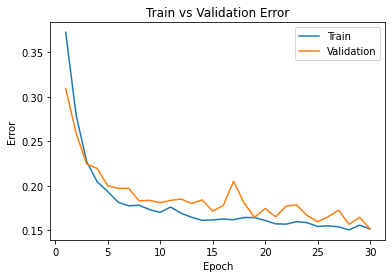

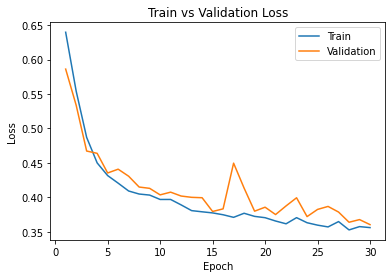

In [30]:
# plot training/validation error and training/validation loss for small_net
print('For small_net:')
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

For large_net:


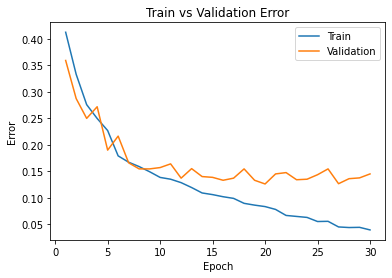

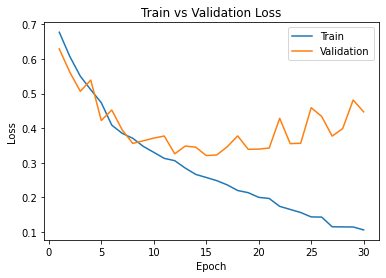

In [31]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

<font color='blue'>
small_net:<br>
Both error curve and loss curve of both training set and validation set are about to settle. The final epoch performances of training set and validation set are very close. There is no overfitting or underfitting.<br>
<br>
large_net:<br>
The loss curve of validation has started increasing, and the error curve  and the loss curve of training set continue decreasing. There is significant overfitting. The training process should be stopped early at about 12th epoch. large_net has greater complexity than small_net, thus overfitting issue is more significant for large_net.
</font>

## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [32]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
# random seed added to reproduce result 
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.001)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.502625, Train loss: 0.6930717387199402 |Validation err: 0.489, Validation loss: 0.6914754658937454
Epoch 2: Train err: 0.4445, Train loss: 0.6914145655632019 |Validation err: 0.398, Validation loss: 0.6906291618943214
Epoch 3: Train err: 0.385875, Train loss: 0.6898092031478882 |Validation err: 0.372, Validation loss: 0.688802907243371
Epoch 4: Train err: 0.3685, Train loss: 0.6870290417671203 |Validation err: 0.366, Validation loss: 0.6848465222865343
Epoch 5: Train err: 0.364125, Train loss: 0.6808282251358032 |Validation err: 0.352, Validation loss: 0.6757433004677296
Epoch 6: Train err: 0.362125, Train loss: 0.6675208044052124 |Validation err: 0.3465, Validation loss: 0.6555010341107845
Epoch 7: Train err: 0.36375, Train loss: 0.650689446926117 |Validation err: 0.366, Validation loss: 0.6409291550517082
Epoch 8: Train err: 0.36375, Train loss: 0.640048484325409 |Validation err: 0.353, 

For large_net:


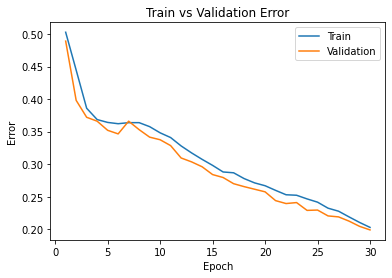

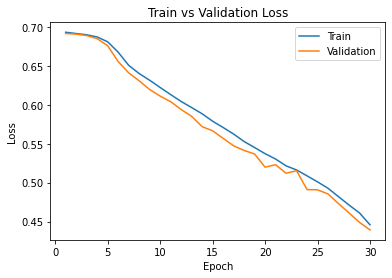

In [33]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
There is slight increase in the total time elapsed for 30 epochs, thus time per epoch. When the learning rate is decreased, the parameter changes each iteration become smaller. Therefore, the learning curve become smoother (more stable). In this case, even at 30th epoch, both error and loss curves continue to decrease for training set and validation set, thus the model has not been trained enough. It requires more epochs to converge. Therefore, overall, the model takes longer to train until it converges to minimum training loss and longer until it reaches minimum validation loss possible.
</font>

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

In [34]:
# random seed added to reproduce result
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.1)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.35475, Train loss: 0.6225771231651306 |Validation err: 0.255, Validation loss: 0.5504780150949955
Epoch 2: Train err: 0.265375, Train loss: 0.5430995841026306 |Validation err: 0.2495, Validation loss: 0.5377349033951759
Epoch 3: Train err: 0.20525, Train loss: 0.4565949592590332 |Validation err: 0.186, Validation loss: 0.43739769142121077
Epoch 4: Train err: 0.202625, Train loss: 0.43546704947948456 |Validation err: 0.173, Validation loss: 0.4078625710681081
Epoch 5: Train err: 0.175875, Train loss: 0.41268452501297 |Validation err: 0.204, Validation loss: 0.46031654719263315
Epoch 6: Train err: 0.16475, Train loss: 0.39256382834911346 |Validation err: 0.185, Validation loss: 0.43424123292788863
Epoch 7: Train err: 0.165125, Train loss: 0.38272759091854097 |Validation err: 0.1935, Validation loss: 0.40100232139229774
Epoch 8: Train err: 0.160625, Train loss: 0.3674855017662048 |Validation 

For large_net:


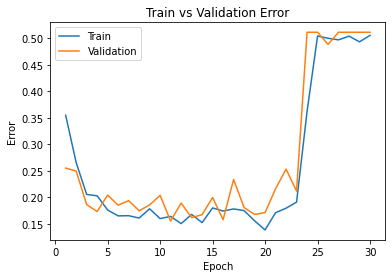

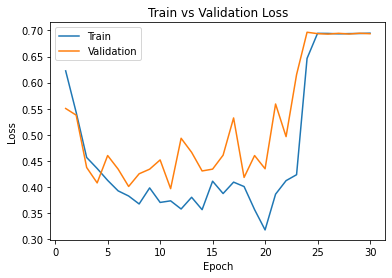

In [35]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
There is no big difference in the total time elapsed for 30 epochs, thus time per epoch. When the learning rate is increased, the parameter changes each iteration become larger. Therefore, the learning curves become more volatile. In this case, learning rate of 0.1 is too large and the training loss is even rising after the initial decrease and some epochs of staying at the loss level. Model fails to converge (get close and stay close) to minimum loss. This model takes forever to run because it cannot converge and potentially a smaller loss might be found in the future epoch.
</font>

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

In [36]:
# random seed added to reproduce result
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.01,batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.502875, Train loss: 0.6934736892580986 |Validation err: 0.4885, Validation loss: 0.6919344812631607
Epoch 2: Train err: 0.447625, Train loss: 0.6916541010141373 |Validation err: 0.415, Validation loss: 0.6911461651325226
Epoch 3: Train err: 0.42625, Train loss: 0.6902140267193317 |Validation err: 0.4225, Validation loss: 0.6895189881324768
Epoch 4: Train err: 0.3875, Train loss: 0.6876846998929977 |Validation err: 0.3695, Validation loss: 0.6854225397109985
Epoch 5: Train err: 0.362875, Train loss: 0.6820096150040627 |Validation err: 0.3505, Validation loss: 0.6765255481004715
Epoch 6: Train err: 0.3625, Train loss: 0.6690057590603828 |Validation err: 0.3475, Validation loss: 0.657353475689888
Epoch 7: Train err: 0.362625, Train loss: 0.6509273238480091 |Validation err: 0.362, Validation loss: 0.637809082865715
Epoch 8: Train err: 0.366625, Train loss: 0.6396986320614815 |Validation err: 0

For large_net:


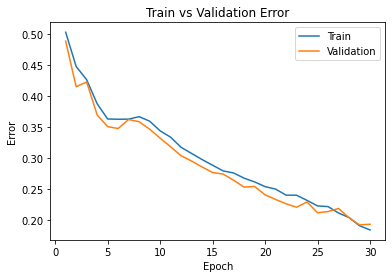

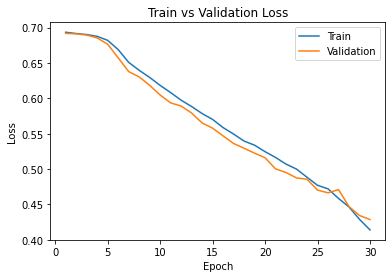

In [37]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
Total time elapsed for 30 epochs, thus also time per epoch, is smaller. With larger batch_size, the computation for each iteration is heavier, but there is smaller number of iteration per epoch. Overall, the computation time per epoch is shorter. When the batch size is increased, the learning curves become more stable. In this case, the loss curve and the error curve of both training set and validation set continue decreasing at 30th epoch, thus the model has not been trained enough. It requires more epochs to converge. Therefore, overall, the model takes longer to train until it converges to minimum training loss and longer until it reaches minimum validation loss possible.
</font>

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

In [38]:
# random seed added to reproduce result
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.01,batch_size=16)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.349, Train loss: 0.619626546561718 |Validation err: 0.306, Validation loss: 0.5676490762233735
Epoch 2: Train err: 0.23575, Train loss: 0.4971144049465656 |Validation err: 0.194, Validation loss: 0.4325545109510422
Epoch 3: Train err: 0.188125, Train loss: 0.4200300444066524 |Validation err: 0.1815, Validation loss: 0.4192423368692398
Epoch 4: Train err: 0.171625, Train loss: 0.3899979693889618 |Validation err: 0.1795, Validation loss: 0.40516878139972684
Epoch 5: Train err: 0.148, Train loss: 0.348451604783535 |Validation err: 0.1405, Validation loss: 0.33830882412195207
Epoch 6: Train err: 0.13375, Train loss: 0.3070673808995634 |Validation err: 0.139, Validation loss: 0.340398380279541
Epoch 7: Train err: 0.12, Train loss: 0.2877437658570707 |Validation err: 0.141, Validation loss: 0.334133807182312
Epoch 8: Train err: 0.107875, Train loss: 0.25931168063730003 |Validation err: 0.1395, V

For large_net:


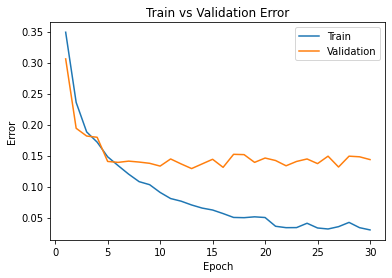

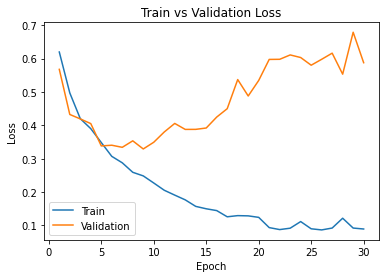

In [39]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
Total time elapsed for 30 epochs, thus also time per epoch, is greater. With smaller batch_size, the computation for each iteration is less, but there is greater number of iteration per epoch. Overall, the computation time per epoch is longer. With smaller batch_size, the model converges much faster, and the training process should be stopped at 5th epoch. Overall, the model takes shorter to train.
</font>

## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

<font color='blue'>
With the default hyperparameters, small_net has learning curves of training set and validation set settling at about the same values, for both loss and error. We want some overfitting, which is the case of large_net. In addition, large_net has lower minimum training loss and lower minimum validation loss. Therefore, large_net is preferred. <br><br>
Smaller batch size is preferred because it can speed up training and gives the progression some volatility. The learning rate should be small for the model to converge (model with learning rate of 0.1 and other hyperparameters remain default fails to converge) and progress slowly (in compensation for increased learning rate). With small learning rate and small batch size, the model can stays at the point about to overfit longer and try to find a model generalizes better.<br><br>
I would like to try large_net with batch_size=16 and learning_rate=0.01.
</font>

### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

In [40]:
# random seed added to reproduce result
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.001,batch_size=16)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.438125, Train loss: 0.6903435536623002 |Validation err: 0.3905, Validation loss: 0.685231092453003
Epoch 2: Train err: 0.36225, Train loss: 0.6601026590466499 |Validation err: 0.3565, Validation loss: 0.6298300364017486
Epoch 3: Train err: 0.3435, Train loss: 0.6202922303676606 |Validation err: 0.311, Validation loss: 0.5929561259746552
Epoch 4: Train err: 0.31, Train loss: 0.5902716280817986 |Validation err: 0.282, Validation loss: 0.5658040552139282
Epoch 5: Train err: 0.281625, Train loss: 0.5598818973302842 |Validation err: 0.254, Validation loss: 0.5307995018959045
Epoch 6: Train err: 0.2605, Train loss: 0.5335026271343232 |Validation err: 0.2755, Validation loss: 0.5411900207996369
Epoch 7: Train err: 0.24225, Train loss: 0.5113216110467911 |Validation err: 0.2355, Validation loss: 0.4964297640323639
Epoch 8: Train err: 0.231625, Train loss: 0.4918843851387501 |Validation err: 0.2105

For large_net:


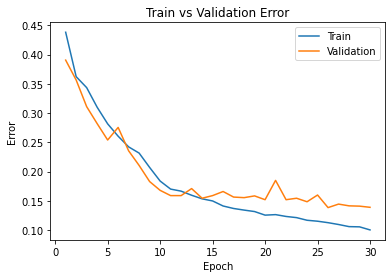

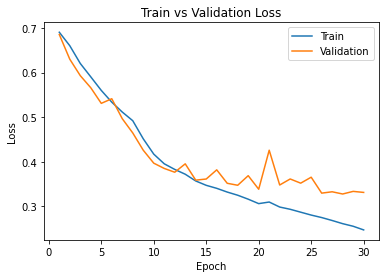

In [41]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=16, learning_rate=0.001, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

<font color='blue'>
With the hyperparameter set in part (a), the difference between training set loss and validation set loss grows very slowly after 14th epoch, which is what I want to increase learning_rate to increase volatility of the training.<br><br>
Therefore, I would suggest change learning rate to 0.03, while keeping batch size to be 16.
</font>

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

In [42]:
# random seed added to reproduce result
torch.manual_seed(1517)
large_net = LargeNet()

# train large_net
train_net(net=large_net,learning_rate=0.003,batch_size=16)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.409125, Train loss: 0.6666413611769676 |Validation err: 0.341, Validation loss: 0.6104079031944275
Epoch 2: Train err: 0.307875, Train loss: 0.5836826004981994 |Validation err: 0.259, Validation loss: 0.5324076671600342
Epoch 3: Train err: 0.262375, Train loss: 0.5328611963987351 |Validation err: 0.2275, Validation loss: 0.4991169376373291
Epoch 4: Train err: 0.215375, Train loss: 0.46945823803544046 |Validation err: 0.1945, Validation loss: 0.43601292657852175
Epoch 5: Train err: 0.1845, Train loss: 0.41579829283058645 |Validation err: 0.1785, Validation loss: 0.40844028532505033
Epoch 6: Train err: 0.165375, Train loss: 0.385272474616766 |Validation err: 0.204, Validation loss: 0.44964763551950454
Epoch 7: Train err: 0.154625, Train loss: 0.3584090499728918 |Validation err: 0.1665, Validation loss: 0.3730700343251228
Epoch 8: Train err: 0.147125, Train loss: 0.3393143789470196 |Validatio

For large_net:


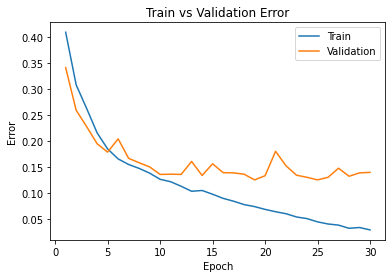

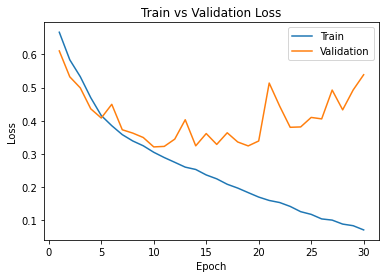

In [43]:
# plot training/validation error and training/validation loss for large_net
print('For large_net:')
model_path = get_model_name("large", batch_size=16, learning_rate=0.003, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [44]:
net = LargeNet()
model_path = get_model_name(net.name, batch_size=16, learning_rate=0.003, epoch=10-1)
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
state = torch.load(file_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part (b) - 2pt

Justify your choice of model from part (a).

<font color='blue'>
Loss function is the objective function to be minimized when training. In addition, calculation of loss function has probabilities involved, which are more precise measurement of result correctness. Also, since the model is trained on training set, validation loss is more unbiased as criterion. Therefore, I use validation loss as the criterion of model selection. <br><br>
Validation loss (0.321425) of the model selected is very close to the lowest of all models tested (0.321025), and is very close to the training loss (0.305284) at that epoch (so the model probably generalizes well).
</font>

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [45]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=64)

# compute classification error for train, val, test
train_err, train_loss= evaluate(net, train_loader, criterion=nn.BCEWithLogitsLoss())
val_err, val_loss= evaluate(net, val_loader, criterion=nn.BCEWithLogitsLoss())
test_err, test_loss= evaluate(net, test_loader, criterion=nn.BCEWithLogitsLoss())

# output result
print('classification error of training set:',train_err)
print('classification error of validation set:',val_err)
print('classification error of test set:',test_err)

Files already downloaded and verified
Files already downloaded and verified
classification error of training set: 0.10575
classification error of validation set: 0.1355
classification error of test set: 0.1345


<font color='blue'>
test classification error of my chosen model: 0.1345
</font>

### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

<font color='blue'>
Test classification error is very close to but slightly lower than validation classification error.<br><br>
I would expect the test error to be higher than the validation error because the hyperparameter selection is made based on validation set, which means the hyperparameter tuning process is more or less biased towards validation set. Neither the training processing nor the hyperparameter tuning process has test set involved. So test error is expected to be higher than validation error.<br><br>
In this case, the test error is lower than the validation error, probably because the training set can represent the test set very well.
</font>

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

<font color='blue'>
The reason the test data set is only used at the very end is that we do not want it to get involved in the training and tuning process that are related to model development. If this is not the case, the model developed would become more or less in preference of test data set. In other words, the information of test data set would be leaking to the model, and it is no longer considered as "unseen data".<br><br>
It is important that we use the test data as little as possible, because we want the test data to provide an unbiased performance measurement to the model.
</font>

## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [46]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

<font color='green'>
Note:<br>
It is mentioned on Piazza that the 2-layer linear ANN model "is a typo", and "3-layer ANN model refers to a model that has three nn.Linear instantiations in its definition, which is what is shown in the SimpleANN architecture. Your task is to simply compare the CNN from previous steps against the simpleANN architecture in part 5, after tuning hyperparameters, and determine which one performs best after exploring different hyperparameters and testing your optimal result on the test data."
</font>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.35325, Train loss: 0.6231249670982361 |Validation err: 0.2945, Validation loss: 0.5831723492592573
Epoch 2: Train err: 0.283625, Train loss: 0.5525073101520538 |Validation err: 0.272, Validation loss: 0.5406838888302445
Epoch 3: Train err: 0.24725, Train loss: 0.5057312026023865 |Validation err: 0.254, Validation loss: 0.5234469119459391
Epoch 4: Train err: 0.218125, Train loss: 0.4722020580768585 |Validation err: 0.247, Validation loss: 0.5266216183081269
Epoch 5: Train err: 0.20225, Train loss: 0.43712231612205504 |Validation err: 0.2245, Validation loss: 0.49767304956912994
Epoch 6: Train err: 0.1795, Train loss: 0.40441106057167053 |Validation err: 0.217, Validation loss: 0.4862071070820093
Epoch 7: Train err: 0.158875, Train loss: 0.3629335584640503 |Validation err: 0.2355, Validation loss: 0.5475550852715969
Epoch 8: Train err: 0.14825, Train loss: 0.34012488889694215 |Validation err

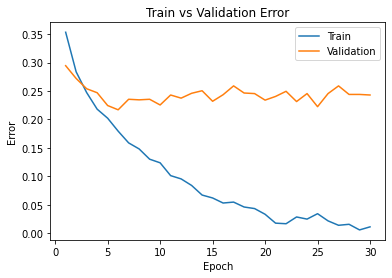

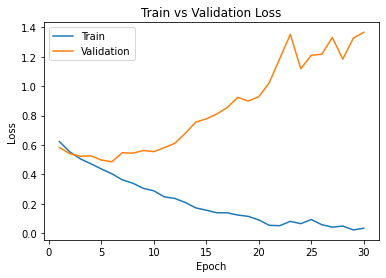

In [47]:
# simpleANN with default hyperparameters (learning rate=0.01, batch_size=64, num_epochs=30)
# random seed added to reproduce result
torch.manual_seed(1517)
simple_net = simpleANN()

# train large_net
train_net(net=simple_net)

# plot training/validation error and training/validation loss for simpleANN
model_path = get_model_name("simple", batch_size=64, learning_rate=0.01, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
With default hyperparameter setting, the model starts to become overfitting at about 6th epoch. Let's decrease learning_rate.
</font>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4235, Train loss: 0.6756847372055054 |Validation err: 0.351, Validation loss: 0.6493572872132063
Epoch 2: Train err: 0.35825, Train loss: 0.6380756287574768 |Validation err: 0.339, Validation loss: 0.6199029237031937
Epoch 3: Train err: 0.34775, Train loss: 0.61939262342453 |Validation err: 0.3195, Validation loss: 0.6096979025751352
Epoch 4: Train err: 0.332, Train loss: 0.6065346393585205 |Validation err: 0.308, Validation loss: 0.605532081797719
Epoch 5: Train err: 0.31675, Train loss: 0.5947850065231324 |Validation err: 0.2925, Validation loss: 0.5969778932631016
Epoch 6: Train err: 0.305875, Train loss: 0.5823179965019226 |Validation err: 0.292, Validation loss: 0.5810324344784021
Epoch 7: Train err: 0.296875, Train loss: 0.5705706522464752 |Validation err: 0.288, Validation loss: 0.579463554546237
Epoch 8: Train err: 0.287, Train loss: 0.5586081466674805 |Validation err: 0.2795, Vali

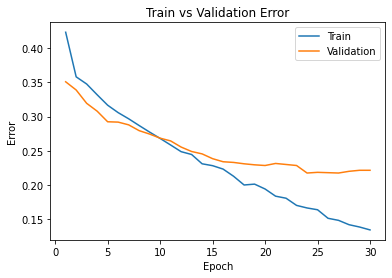

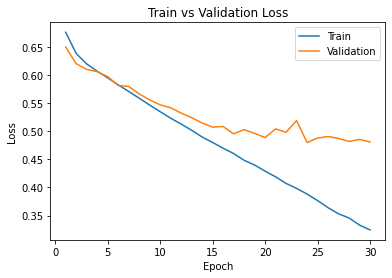

In [48]:
# simpleANN with default hyperparameters (learning rate=0.001, batch_size=64, num_epochs=30)
# random seed added to reproduce result
torch.manual_seed(1517)
simple_net = simpleANN()

# train large_net
train_net(net=simple_net,learning_rate=0.001)

# plot training/validation error and training/validation loss for simpleANN
model_path = get_model_name("simple", batch_size=64, learning_rate=0.001, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
Let's decrease batch size to give a bit more volatility.
</font>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.367875, Train loss: 0.6376183488368988 |Validation err: 0.321, Validation loss: 0.6046213726997376
Epoch 2: Train err: 0.308, Train loss: 0.5851641544103623 |Validation err: 0.286, Validation loss: 0.5723430552482605
Epoch 3: Train err: 0.2775, Train loss: 0.547130351126194 |Validation err: 0.2635, Validation loss: 0.547213672876358
Epoch 4: Train err: 0.255375, Train loss: 0.5154906343221665 |Validation err: 0.2555, Validation loss: 0.5278622083663941
Epoch 5: Train err: 0.2355, Train loss: 0.4874087530374527 |Validation err: 0.24, Validation loss: 0.502339184641838
Epoch 6: Train err: 0.21675, Train loss: 0.4606137618124485 |Validation err: 0.242, Validation loss: 0.5019638621807099
Epoch 7: Train err: 0.197125, Train loss: 0.43463105204701424 |Validation err: 0.2375, Validation loss: 0.5085292494297028
Epoch 8: Train err: 0.1885, Train loss: 0.41462643568217755 |Validation err: 0.2265, 

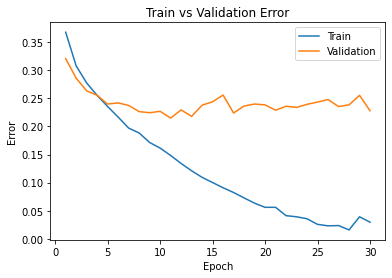

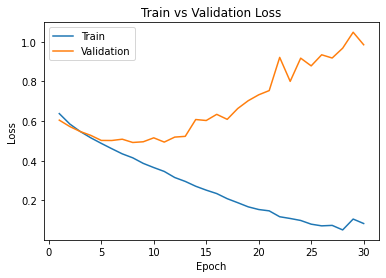

In [49]:
# simpleANN with default hyperparameters (learning rate=0.001, batch_size=16, num_epochs=30)
# random seed added to reproduce result
torch.manual_seed(1517)
simple_net = simpleANN()

# train large_net
train_net(net=simple_net,learning_rate=0.001,batch_size=16)

# plot training/validation error and training/validation loss for simpleANN
model_path = get_model_name("simple", batch_size=16, learning_rate=0.001, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
Decrease learning rate again to slow down the training in compensation for smaller batch size.
</font>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.403875, Train loss: 0.6684441695213318 |Validation err: 0.3495, Validation loss: 0.6386449818611145
Epoch 2: Train err: 0.35275, Train loss: 0.629585983812809 |Validation err: 0.3245, Validation loss: 0.6150415918827057
Epoch 3: Train err: 0.335, Train loss: 0.6113137792348862 |Validation err: 0.309, Validation loss: 0.6040255200862884
Epoch 4: Train err: 0.32025, Train loss: 0.5965458319783211 |Validation err: 0.3035, Validation loss: 0.5962338647842407
Epoch 5: Train err: 0.302875, Train loss: 0.5823382135033608 |Validation err: 0.2875, Validation loss: 0.5804302492141724
Epoch 6: Train err: 0.294625, Train loss: 0.5680635678172111 |Validation err: 0.2845, Validation loss: 0.5701361854076386
Epoch 7: Train err: 0.2815, Train loss: 0.5533687655925751 |Validation err: 0.2775, Validation loss: 0.5619242236614227
Epoch 8: Train err: 0.272625, Train loss: 0.5398440471291542 |Validation err: 0

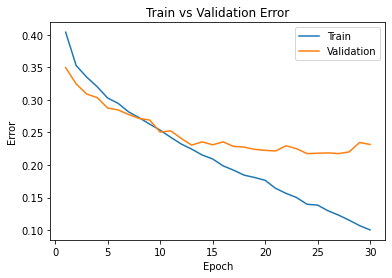

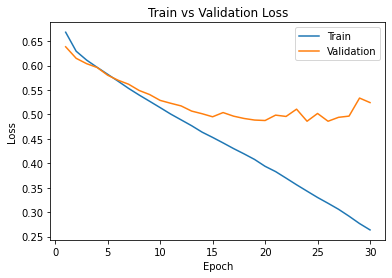

In [50]:
# simpleANN with default hyperparameters (learning rate=0.0003, batch_size=16, num_epochs=30)
# random seed added to reproduce result
torch.manual_seed(1517)
simple_net = simpleANN()

# train large_net
train_net(net=simple_net,learning_rate=0.0003,batch_size=16)

# plot training/validation error and training/validation loss for simpleANN
model_path = get_model_name("simple", batch_size=16, learning_rate=0.0003, epoch=29) # last epoch ID = num_epochs-1
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
plot_training_curve(file_path)

<font color='blue'>
20th epoch of the last model (learning rate=0.0003, batch_size=16, num_epochs=30) has validation loss close to the minimum of all the epoches of the four models tested (the minimal one has very significant overfitting), and the overfitting at this epoch is not large. So 20th epoch of the last model is considered as the optimal model.
</font>

In [51]:
# evaluate optimal simpleANN on test set
# load model
net = simpleANN()
model_path = get_model_name(net.name, batch_size=16, learning_rate=0.0003, epoch=20-1)
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
state = torch.load(file_path)
net.load_state_dict(state)

# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=64)

# compute classification error for train, val, test
train_err, train_loss= evaluate(net, train_loader, criterion=nn.BCEWithLogitsLoss())
val_err, val_loss= evaluate(net, val_loader, criterion=nn.BCEWithLogitsLoss())
test_err, test_loss= evaluate(net, test_loader, criterion=nn.BCEWithLogitsLoss())

# output result
print('classification error of training set:',train_err)
print('classification error of validation set:',val_err)
print('classification error of test set:',test_err)

Files already downloaded and verified
Files already downloaded and verified
classification error of training set: 0.157375
classification error of validation set: 0.2225
classification error of test set: 0.235


<font color='blue'>
My best CNN model (test err: 0.1345) is better than my best simpleANN model (test err: 0.235) on classifying car and truck images, and the difference in performance is quite significant. The non-linearity brought by the convolutional layer really benefits the modeling process.
</font>

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus